<a href="https://colab.research.google.com/github/Varun-Mulchandani/Reddit-Flair-Classifier/blob/master/Final_LSTM_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
pip install tensorflow==1.15.0

In [4]:
pip install keras==2.2.5

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
path = '/content/'
embedding_file = f'{path}glove.6B.50d.txt'
train_file = f'{path}reddddddit.csv'

In [0]:
train = pd.read_csv(train_file)
list_sentences_train = train['title'].fillna('_na_').values
list_classes = ["AskIndia", "Non-Political", "[R]eddiquette", 
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food", "AMA"]

In [9]:
train.flair.value_counts()

Politics              200
AskIndia              200
Photography           200
Policy/Economy        200
Sports                200
Food                  200
Business/Finance      200
AMA                   200
Non-Political         200
Science/Technology    200
Scheduled             200
[R]eddiquette          36
Name: flair, dtype: int64

In [0]:
def print_title(index):
  example = train[train.index == index][['title','flair']].values[0]
  if len(example) > 0:
    print(example[0])
    print('Falir:', example[1])

In [11]:
print_title(10)

hello group students netherlands research indian market could please help us filling survey
Falir: AskIndia


In [12]:
print_title(100)

nonpolitical newspaper 50 year old today
Falir: Non-Political


In [13]:
max_no_word = 50000
max_seq_length = 250
embedding_dim = 100

tokenizer = Tokenizer(num_words = max_no_word, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)
tokenizer.fit_on_texts(train['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 4310 unique tokens


In [14]:
x = tokenizer.texts_to_sequences(train['title'].values)
x = pad_sequences(x, maxlen = max_seq_length)
print('Shape of data tensor:', x.shape)

Shape of data tensor: (2236, 250)


In [15]:
y = pd.get_dummies(train['flair']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (2236, 12)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2012, 250) (2012, 12)
(224, 250) (224, 12)


In [17]:
model = Sequential()
model.add(Embedding(max_no_word, embedding_dim, input_length = x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(12, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1212      
Total params: 5,081,612
Trainable params: 5,081,612
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
epochs = 10
batch_size = 64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1810 samples, validate on 202 samples
Epoch 1/10





1810/1810 [==============================] - 18s 10ms/step - loss: 2.4582 - acc: 0.1000 - val_loss: 2.4311 - val_acc: 0.0941
Epoch 2/10
1810/1810 [==============================] - 16s 9ms/step - loss: 2.3639 - acc: 0.2337 - val_loss: 2.3139 - val_acc: 0.2426
Epoch 3/10
1810/1810 [==============================] - 16s 9ms/step - loss: 2.0738 - acc: 0.4619 - val_loss: 1.8608 - val_acc: 0.4950
Epoch 4/10
1810/1810 [==============================] - 17s 9ms/step - loss: 1.3948 - acc: 0.6801 - val_loss: 1.2340 - val_acc: 0.7376
Epoch 5/10
1810/1810 [==============================] - 18s 10ms/step - loss: 0.8251 - acc: 0.8348 - val_loss: 0.8540 - val_acc: 0.8218
Epoch 6/10
1810/1810 [==============================] - 17s 9ms/step - loss: 0.4908 - acc: 0.9039 - val_loss: 0.7089 - val_acc: 0.8614
Epoch 7/10
1810/1810 [=================

In [19]:
acc = model.evaluate(x_test, y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(acc[0],acc[1]))


224/224 [==============================] - 1s 2ms/step
Test set
 Loss: 0.312
 Accuracy: 0.924


In [0]:
import pickle
pickle.dump(model, open('Classifier_bert.pkl','wb'))

In [0]:
def generate_flair(title):
  title = [title]
  seq = tokenizer.texts_to_sequences(title)
  padded = pad_sequences(seq, maxlen = max_seq_length)
  pred = model.predict(padded)
  return list_classes[np.argmax(pred)]

In [53]:
generate_flair('My fathers boss calling him to join business from today')

Business/Finance


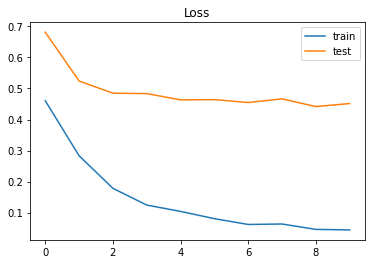

In [54]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

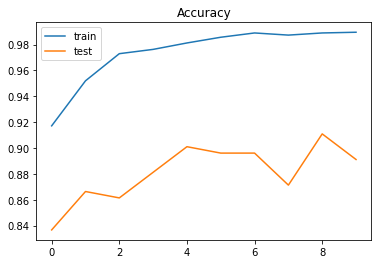

In [59]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [60]:
model = pickle.load(open('model.pkl','rb'))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.

